In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import SpectralEmbedding
import seaborn as sns
import os

import sys
sys.path.append(sys.path[0][:-38])

import imp

from ikd import utils, core, evaluate, datasets, epca
imp.reload(utils)
imp.reload(core)
imp.reload(evaluate)
imp.reload(datasets)
imp.reload(epca)

<module 'ikd.epca' from 'd:\\GT\\Lab\\ikd NeurIPS 2022\\src\\ikd\\epca.py'>

## Specific trial

### GP

Too many remaining indices, use nearest neighbors to find all cliques for every points
Clique threshold: 0.3, number of cliques: 1000


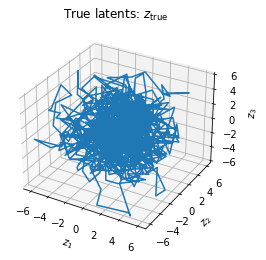

<Figure size 432x288 with 0 Axes>

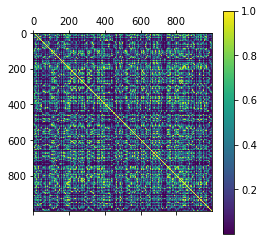

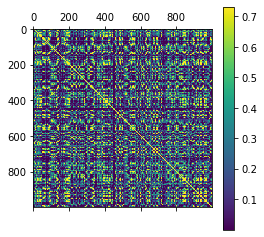

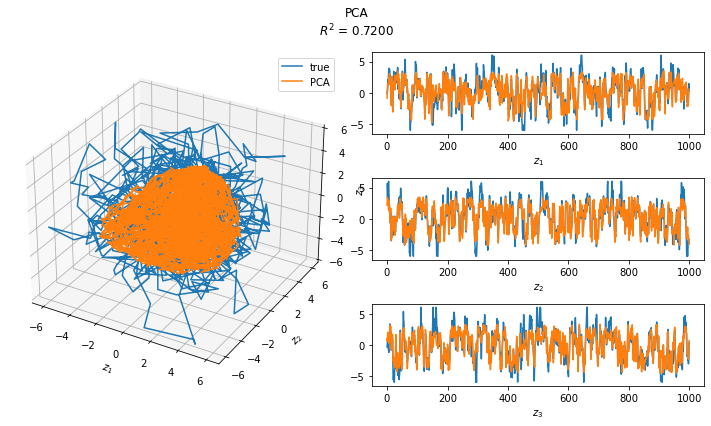

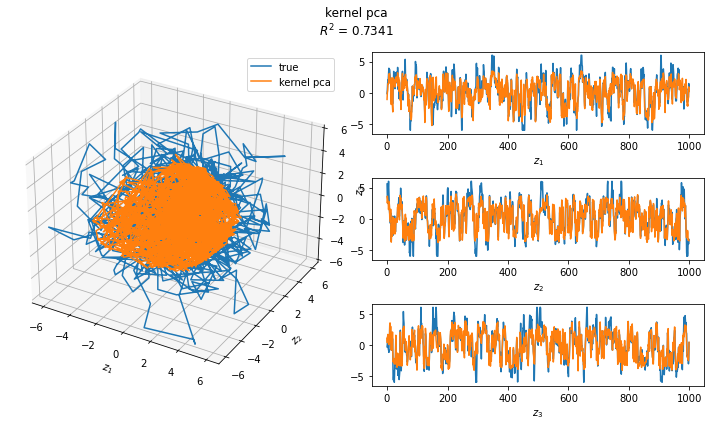

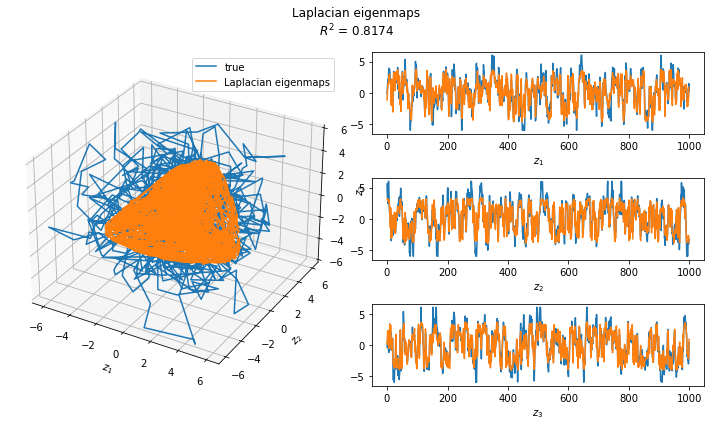

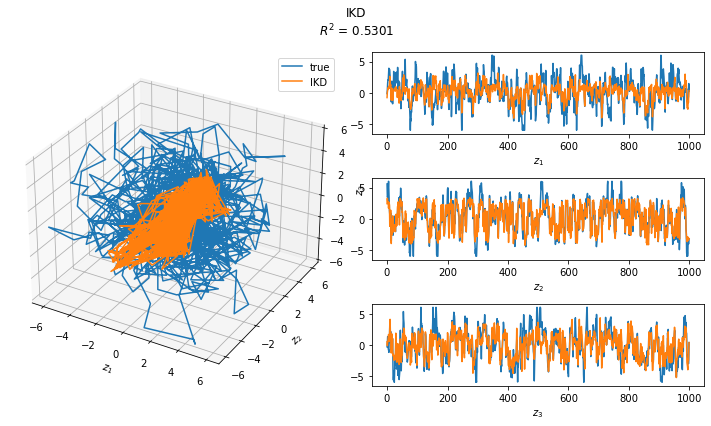

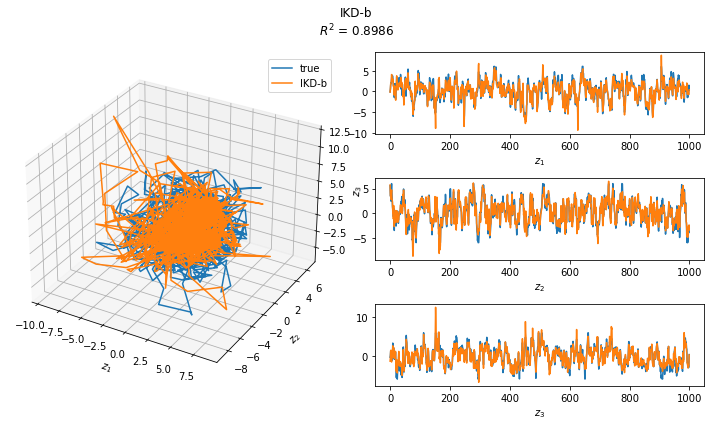

In [14]:
d_latent = 3
n_points = 1000
d_observation = 50
seed = 0
rng = np.random.default_rng(seed=seed)
z_true = datasets.generate_latent_from_prior(d_latent, n_points, kernel='autoregressive', variance=6, length_scale=5, bound=6, seed=seed)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.plot(z_true[:, 0], z_true[:, 1], z_true[:, 2])
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
plt.title("True latents: $z_\\mathrm{true}$")

cov_true = utils.kernel_cov_generator(z_true, length_scale=3)
plt.figure()
plt.matshow(cov_true)
plt.colorbar()

x = datasets.gaussian_process_generator(cov_true, d_observation, seed=seed) + rng.normal(scale=0.05, size=(n_points, d_observation))
cov_samp = np.cov(x)
variance_samp = np.mean(cov_samp) * 3.5
cov_samp_th = utils.filt_cov_samp(cov_samp, variance_samp)

plt.matshow(cov_samp_th)
plt.colorbar()

z_pca = PCA(n_components=d_latent).fit_transform(x) # PCA
evaluate.compare_latents(z_true, utils.align(z_true, z_pca), "PCA")

z_kernel_pca = KernelPCA(n_components=d_latent, kernel='sigmoid').fit_transform(x) # kernel PCA
evaluate.compare_latents(z_true, utils.align(z_true, z_kernel_pca), "kernel pca")

z_le = SpectralEmbedding(n_components=d_latent).fit_transform(x) # Laplacian eigenmaps
evaluate.compare_latents(z_true, utils.align(z_true, z_le), "Laplacian eigenmaps")

z_ikd = core.ikd(cov_samp_th, d_latent, variance=variance_samp, length_scale=1)[0]
z_ikd_b = core.ikd_blockwise(cov_samp_th, d_latent, variance=variance_samp, clique_th_or_d_observation=d_observation)
evaluate.compare_latents(z_true, utils.align(z_true, z_ikd), "IKD")
evaluate.compare_latents(z_true, utils.align(z_true, z_ikd_b), "IKD-b")

### sin

Too many remaining indices, use nearest neighbors to find all cliques for every points
Clique threshold: 0.3, number of cliques: 1000


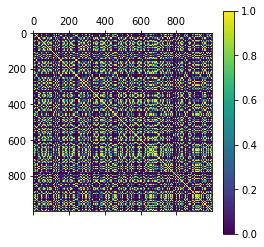

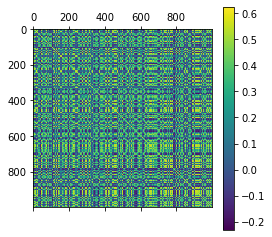

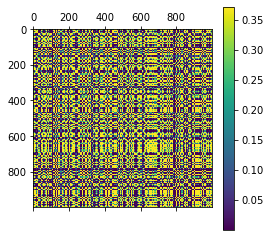

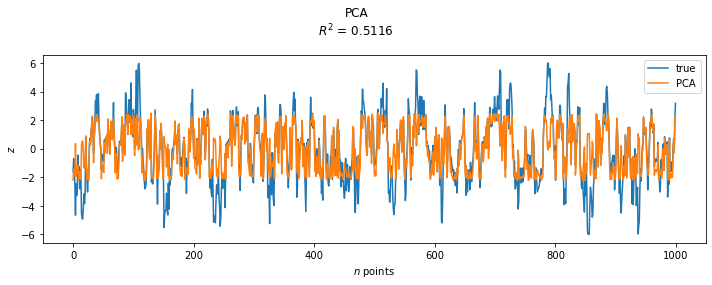

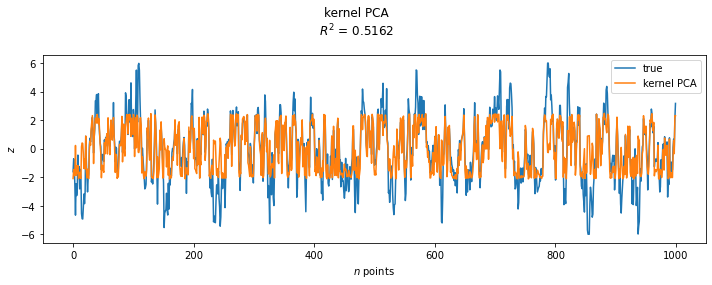

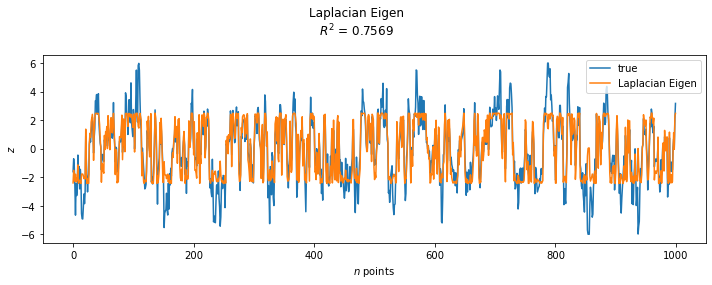

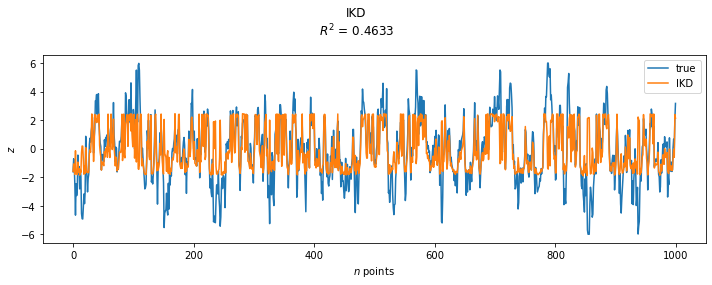

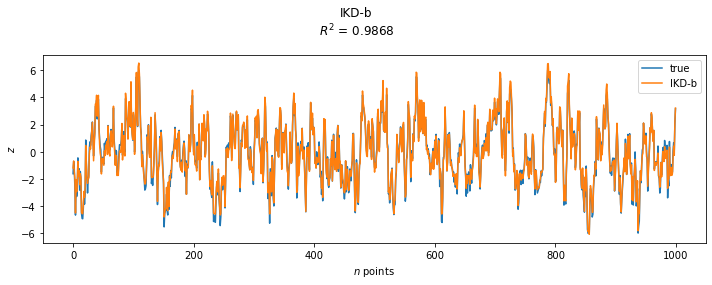

In [15]:
d_latent = 1
n_points = 1000
d_observation = 10
seed = 7
rng = np.random.default_rng(seed=seed)
z_true = datasets.generate_latent_from_prior(d_latent, n_points, kernel='autoregressive', variance=6, length_scale=5, bound=6, seed=seed)
plt.matshow(utils.kernel_cov_generator(z_true))
plt.colorbar()
omega = rng.uniform(low=-1, high=1, size=(d_observation, d_latent))
phi = rng.uniform(low=-np.pi, high=np.pi, size=(1, d_observation))
x = np.sin(z_true @ omega.T + phi) + rng.normal(scale=0.1, size=(n_points, d_observation))
cov_samp = np.cov(x)
plt.matshow(cov_samp)
plt.colorbar()
variance_samp = np.mean(cov_samp) * 2
cov_samp_th = utils.filt_cov_samp(cov_samp, variance_samp)

plt.matshow(cov_samp_th)
plt.colorbar()

z_pca = PCA(n_components=d_latent).fit_transform(x)
evaluate.compare_latents(z_true, utils.align(z_true, z_pca), "PCA")

z_kernel_pca = KernelPCA(n_components=d_latent, kernel='cosine').fit_transform(x) # kernel PCA
evaluate.compare_latents(z_true, utils.align(z_true, z_kernel_pca), "kernel PCA")

z_le = SpectralEmbedding(n_components=d_latent).fit_transform(x) # Laplacian eigenmaps
evaluate.compare_latents(z_true, utils.align(z_true, z_le), "Laplacian Eigen")

z_ikd = core.ikd(cov_samp_th, d_latent, variance=variance_samp, length_scale=1)[0]
z_ikd_b = core.ikd_blockwise(cov_samp_th, d_latent, variance=variance_samp, clique_th_or_d_observation=0.3)
evaluate.compare_latents(z_true, utils.align(z_true, z_ikd), "IKD")
evaluate.compare_latents(z_true, utils.align(z_true, z_ikd_b), "IKD-b")

### Gaussain bump

Too many remaining indices, use nearest neighbors to find all cliques for every points
Clique threshold: 0.3, number of cliques: 1000


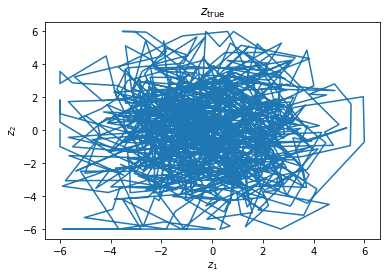

<Figure size 432x288 with 0 Axes>

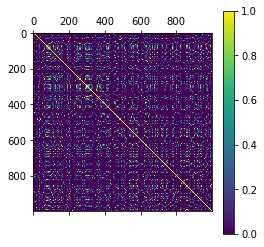

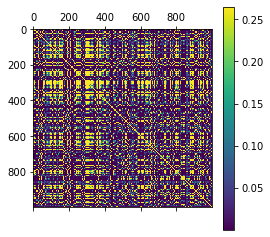

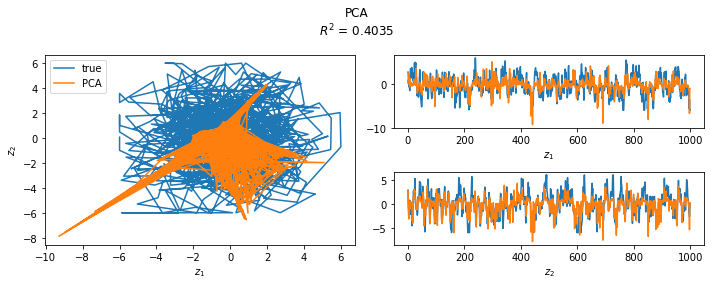

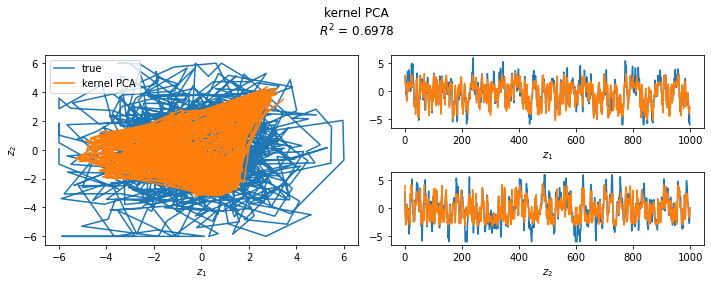

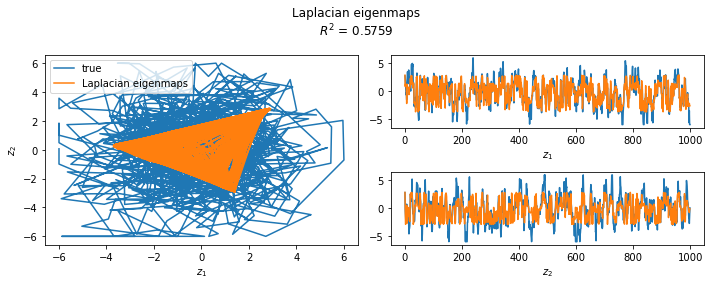

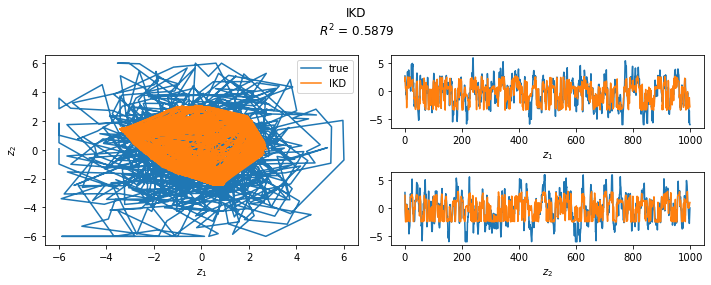

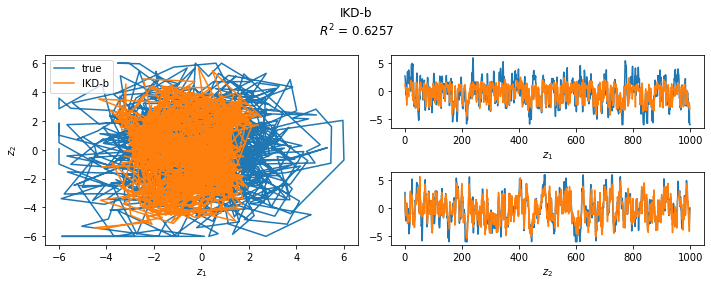

In [16]:
d_latent = 2
n_points = 1000
d_observation = 20
seed = 10
rng = np.random.default_rng(seed=seed)
z_true = datasets.generate_latent_from_prior(d_latent, n_points, kernel='autoregressive', variance=6, length_scale=5, bound=6, seed=seed)
plt.plot(z_true[:, 0], z_true[:, 1])
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.title('$z_{\\mathrm{true}}$')

cov_true = utils.kernel_cov_generator(z_true)
plt.figure()
plt.matshow(cov_true)
plt.colorbar()

x = datasets.gaussian_bump_generator(z_true, 100, d_observation, area=6, variance=20, length_scale=1, seed=seed) + rng.normal(scale=0.05, size=(n_points, d_observation))
cov_samp = np.cov(x)
variance_samp = np.mean(cov_samp) * 2
cov_samp_th = utils.filt_cov_samp(cov_samp, variance_samp)

plt.matshow(cov_samp_th)
plt.colorbar()

z_pca = PCA(n_components=d_latent).fit_transform(x) # PCA
evaluate.compare_latents(z_true, utils.align(z_true, z_pca), "PCA")

z_kernel_pca = KernelPCA(n_components=d_latent, kernel='sigmoid').fit_transform(x) # kernel PCA
evaluate.compare_latents(z_true, utils.align(z_true, z_kernel_pca), "kernel PCA")

z_le = SpectralEmbedding(n_components=d_latent).fit_transform(x) # Laplacian eigenmaps
evaluate.compare_latents(z_true, utils.align(z_true, z_le), "Laplacian eigenmaps")

z_ikd = core.ikd(cov_samp_th, d_latent, variance=variance_samp, length_scale=1)[0]
z_ikd_b = core.ikd_blockwise(cov_samp_th, d_latent, variance=variance_samp, clique_th_or_d_observation=d_observation)
evaluate.compare_latents(z_true, utils.align(z_true, z_ikd), "IKD")
evaluate.compare_latents(z_true, utils.align(z_true, z_ikd_b), "IKD-b")

## Whole experiment

In [17]:
df_list = []
for f in ('GP', 'sin', 'Gaussian bump'):
    for n_attributes in (10, 20, 50, 100, 200, 500, 1000):
        df_list.append(pd.read_csv(f'outputs/{f}_{n_attributes}.csv', index_col=0))
df = pd.concat(df_list, ignore_index=True)
df.n_attributes = df.n_attributes.astype(str)

result = pd.DataFrame(index=['GP', 'sin', 'Gaussian bump'], columns=['PCA', 'kernel PCA', 'Laplacian eigenmaps', 'IKD', 'IKD-b', 'True'])

In [18]:
d_latent = 3
n_points = 1000
d_observation = 50
seed = 0
rng = np.random.default_rng(seed=seed)
z_true = datasets.generate_latent_from_prior(d, n_points, kernel='autoregressive', variance=6, length_scale=5, bound=6, seed=seed)
cov_true = utils.kernel_cov_generator(z_true, length_scale=3)

x = datasets.gaussian_process_generator(cov_true, d_observation, seed=seed) + rng.normal(scale=0.05, size=(n_points, d_observation))
cov_samp = np.cov(x)
variance_samp = np.mean(cov_samp) * 3.5
cov_samp_th = utils.filt_cov_samp(cov_samp, variance_samp)

z_pca = PCA(n_components=d_latent).fit_transform(x) # pca
z_kernel_pca = KernelPCA(n_components=d_latent, kernel='sigmoid').fit_transform(x) # kernel_pca
z_le = SpectralEmbedding(n_components=d_latent).fit_transform(x)
z_ikd = core.ikd(cov_samp_th, d_latent, variance=variance_samp, length_scale=1)[0]
z_ikd_b = core.ikd_blockwise(cov_samp_th, d_latent, variance=variance_samp, clique_th_or_d_observation=d_observation)

z_pca_aligned = utils.align(z_true, z_pca)
z_kernel_pca_aligned = utils.align(z_true, z_kernel_pca)
z_le_aligned = utils.align(z_true, z_le)
z_ikd_aligned = utils.align(z_true, z_ikd)
z_ikd_b_aligned = utils.align(z_true, z_ikd_b)

result.loc['GP'] = [z_pca_aligned, z_kernel_pca_aligned, z_le_aligned, z_ikd_aligned, z_ikd_b_aligned, z_true]

Too many remaining indices, use nearest neighbors to find all cliques for every points
Clique threshold: 0.3, number of cliques: 1000


In [19]:
d_latent = 1
n_points = 1000
d_observation = 50
seed = 0
rng = np.random.default_rng(seed=seed)
z_true = datasets.generate_latent_from_prior(d_latent, n_points, kernel='autoregressive', variance=6, length_scale=5, bound=6, seed=seed)

omega = rng.uniform(low=-1, high=1, size=(d_observation, d_latent))
phi = rng.uniform(low=-np.pi, high=np.pi, size=(1, d_observation))
x = np.sin(z_true @ omega.T + phi) + rng.normal(scale=0.1, size=(n_points, d_observation))
cov_samp = np.cov(x)

variance_samp = np.mean(cov_samp) * 2
cov_samp_th = utils.filt_cov_samp(cov_samp, variance_samp)


z_pca = PCA(n_components=d_latent).fit_transform(x) # pca
z_kernel_pca = KernelPCA(n_components=d_latent, kernel='cosine').fit_transform(x) # kernel_pca
z_le = SpectralEmbedding(n_components=d_latent).fit_transform(x)
z_ikd = core.ikd(cov_samp_th, d_latent, variance=variance_samp, length_scale=1)[0]
z_ikd_b = core.ikd_blockwise(cov_samp_th, d_latent, variance=variance_samp, clique_th_or_d_observation=0.3)

z_pca_aligned = utils.align(z_true, z_pca)
z_kernel_pca_aligned = utils.align(z_true, z_kernel_pca)
z_le_aligned = utils.align(z_true, z_le)
z_ikd_aligned = utils.align(z_true, z_ikd)
z_ikd_b_aligned = utils.align(z_true, z_ikd_b)

result.loc['sin'] = [z_pca_aligned, z_kernel_pca_aligned, z_le_aligned, z_ikd_aligned, z_ikd_b_aligned, z_true]

Clique threshold: 0.3, number of cliques: 501


In [21]:
d = 2
n_points = 1000
d_observation = 50
seed = 0
rng = np.random.default_rng(seed=seed)
z_true = datasets.generate_latent_from_prior(d, n_points, kernel='autoregressive', variance=6, length_scale=5, bound=6, seed=seed)

cov_true = utils.kernel_cov_generator(z_true)

x = datasets.gaussian_bump_generator(z_true, 100, d_observation, area=6, variance=20, length_scale=1, seed=seed) + rng.normal(scale=0.05, size=(n_latents, d_observation))
cov_samp = np.cov(x)
variance_samp = np.mean(cov_samp) * 2
cov_samp_th = utils.filt_cov_samp(cov_samp, variance_samp)

z_pca = PCA(n_components=d).fit_transform(x) # pca
z_kernel_pca = KernelPCA(n_components=d, kernel='sigmoid').fit_transform(x) # kernel_pca
z_le = SpectralEmbedding(n_components=d).fit_transform(x)
z_ikd = core.ikd(cov_samp_th, d, variance=variance_samp, length_scale=1)[0]
z_ikd_b = core.ikd_blockwise(cov_samp_th, d, variance=variance_samp, clique_th_or_d_observation=d_observation)

z_pca_aligned = utils.align(z_true, z_pca)
z_kernel_pca_aligned = utils.align(z_true, z_kernel_pca)
z_le_aligned = utils.align(z_true, z_le)
z_ikd_aligned = utils.align(z_true, z_ikd)
z_ikd_b_aligned = utils.align(z_true, z_ikd_b)

result.loc['Gaussian bump'] = [z_pca_aligned, z_kernel_pca_aligned, z_le_aligned, z_ikd_aligned, z_ikd_b_aligned, z_true]

Too many remaining indices, use nearest neighbors to find all cliques for every points
Clique threshold: 0.3, number of cliques: 1000


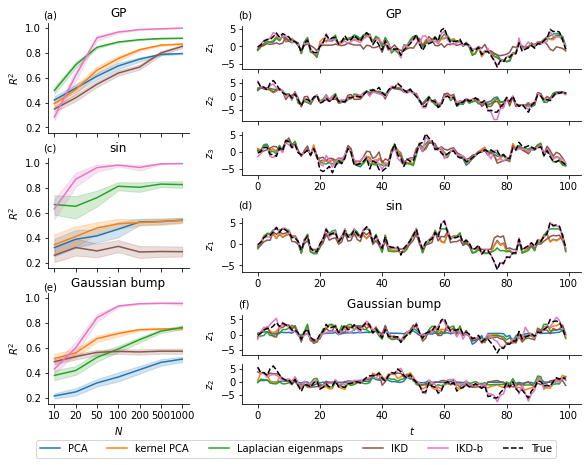

In [22]:
fig = plt.figure(figsize=(8, 6), constrained_layout=True)
color_list = ['C0', 'C1', 'C2', 'C5', 'C6']

subfigs = fig.subfigures(1, 2, width_ratios=[1, 2])
axs = subfigs[0].subplots(3, 1, sharex=True, sharey=True)
for i in range(3):
    ax = sns.lineplot(x='n_attributes', y='r2', hue='method', data=df[df['f'] == ('GP', 'sin', 'Gaussian bump')[i]], ax=axs[i], palette=color_list, legend=False)
    ax.set(xlabel='$N$', ylabel='$R^2$', title=result.index[i])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

subsubfigs = subfigs[1].subfigures(3, 1, height_ratios=[4, 2, 3])
axs = subsubfigs[0].subplots(3, 1, sharex=True)
for i in range(3):
    for j, column in enumerate(result.columns[:-1]):
        axs[i].plot(result.loc['GP', column][:100, i], c=color_list[j])
    axs[i].plot(result.loc['GP', 'True'][:100, i], 'k--')
    axs[i].set_ylabel(f'$z_{i+1}$')
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
subsubfigs[0].suptitle('GP')

ax = subsubfigs[1].add_subplot(1, 1, 1)
for i, column in enumerate(result.columns[:-1]):
    ax.plot(result.loc['sin', column][:100, 0], c=color_list[i])
ax.plot(result.loc['sin', 'True'][:100, 0], 'k--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('$z_1$')
subsubfigs[1].suptitle('sin')

axs = subsubfigs[2].subplots(2, 1, sharex=True)
for i in range(2):
    for j, column in enumerate(result.columns[:-1]):
        axs[i].plot(result.loc['Gaussian bump', column][:100, i], c=color_list[j], label=column)
    axs[i].plot(result.loc['Gaussian bump', 'True'][:100, i], 'k--', label='True')
    axs[i].set_ylabel(f'$z_{i+1}$')
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
axs[1].set_xlabel('$t$')
subsubfigs[2].suptitle('Gaussian bump')

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.06), ncol=6)

fig.text(0.06, 0.97, '(a)')
fig.text(0.40, 0.97, '(b)')
fig.text(0.06, 0.66, '(c)')
fig.text(0.40, 0.53, '(d)')
fig.text(0.06, 0.34, '(e)')
fig.text(0.40, 0.30, '(f)')

fig.savefig('exp1_Gaussian_noisy_observations.pdf', bbox_inches='tight')